In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [24]:
df = pd.read_csv('dataset/spam.csv', encoding='ISO-8859–1') 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df = df.drop(df.iloc[:, 2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
cols = {
    'v1' : 'Labels',
    'v2' : 'SMS'
}

df = df.rename(columns=cols)
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df['Labels'].value_counts()

Labels
ham     4825
spam     747
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [29]:
df.describe()

,Labels,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [30]:
df.isnull().sum()

Labels    0
SMS       0
dtype: int64

In [31]:
labels = {
    'spam' : 1,
    'ham' : 0
}

df['Labels'] = df['Labels'].map(labels)
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
X = df['SMS'].values
y = df['Labels'].values

In [33]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [20]:
print(f'Dimensi data: {X_train.shape}')

Dimensi data: (3900, 7190)


In [52]:
model = MultinomialNB()
model.fit(X_train, y_train)

print('training accuracy is --> ',model.score(X_train,y_train) * 100)
print('test accuracy is --> ',model.score(X_test,y_test) * 100)

training accuracy is -->  99.48717948717949
test accuracy is -->  97.54784688995215


In [56]:
def visualize(label):
    words = ''
    for msg in df[df['Labels'] == label]['SMS']:
        msg = msg.lower()
        words += msg + ' '
    
    wordcloud = WordCloud(
        width=800, 
        height=600, 
        background_color='white',  
        colormap='viridis', 
        contour_color='black',
        contour_width=1,
        max_words=100
    ).generate(words)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


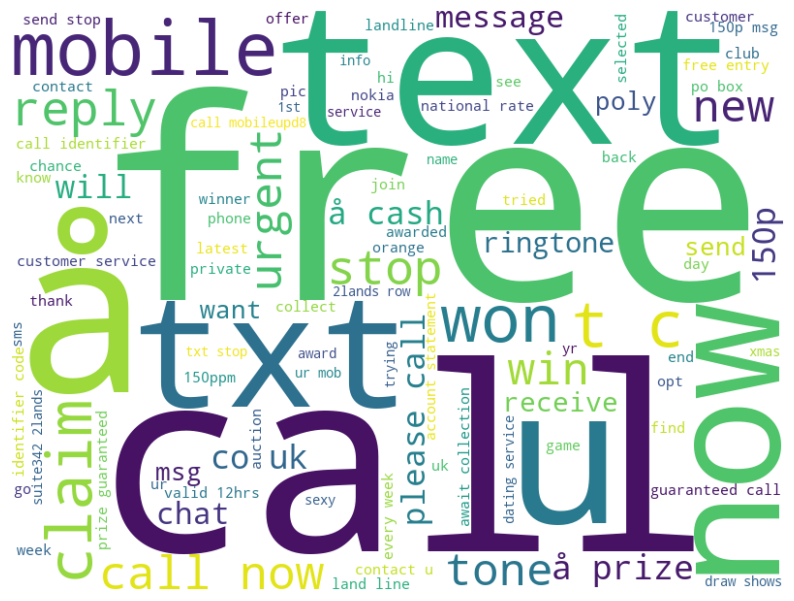

In [57]:
visualize(1)

In [58]:
your_message = 'You are the lucky winner for the lottery price of $6million.'

your_message = cv.transform([your_message])
pred = model.predict(your_message)
print(pred[0])

1
